# Import Library

In [1]:
import gymnasium as gym
import numpy as np
import torch

c:\Users\choho\RL_project\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Parameters and environment

In [14]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
if torch.backends.cudnn.enabled:
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

epsilon = 0.0005
batch_size = 32  
update_frequency = 150
nframes = 15000 
memory = 1500



# environment
# We use CartPole-v1 from OPENAI Gymnasium's repository
environment = gym.make("CartPole-v1", max_episode_steps=200, render_mode="rgb_array")

###  Function for training and testing each extension and rainbow

In [12]:
from utils.DQN import DQNAgent  

def train_and_test_agent(Agent,environment, memory, batch_size, update_frequency, num_frames, video_folder, epsilon=None, seed=42):
    """
    Initializes, trains and tests a DQN agent on a specified environment.
    
    Args:
        Agent : The agent class to be used.
        environment: The environment on which the agent will be trained and tested.
        memory: The size of the repetition memory.
        batch_size: The batch size for sampling.
        update_frequency: Update frequency of the target network.
        num_frames: Number of frames for training.
        video_folder: Folder where to store the video of the test episode.
        epsilon: Epsilon decay rate. Pass None for noisy networks.
        seed: Random seed for reproducibility.
    """
    # Agent initialisation with or without epsilon based on agent type
    if epsilon is not None:
        agent = Agent(environment, memory, batch_size, update_frequency, epsilon, seed)
    else:
        # For Noisy Nets, where epsilon is not applied
        agent = Agent(environment, memory, batch_size, update_frequency, seed=seed)

    # Agent training
    agent.train(num_frames)

    # Test the agent and store an episode on video
    agent.test(video_folder=video_folder)


## DQN

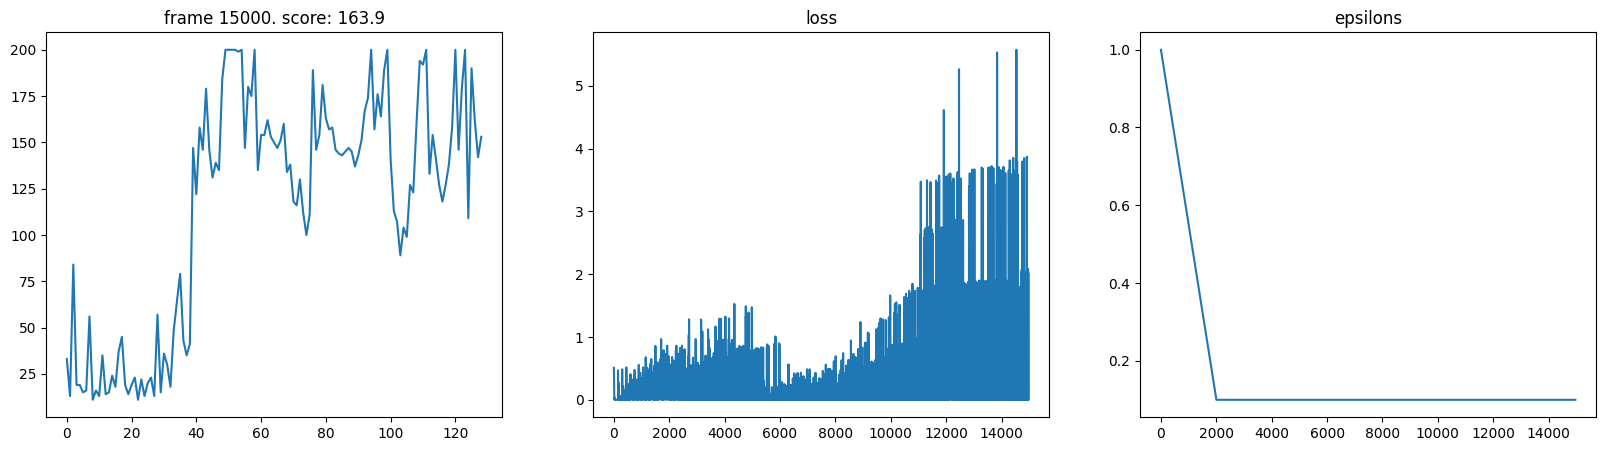

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\dqn folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4
score:  146.0


In [16]:
from utils.DQN import DQNAgent
# DQN
train_and_test_agent(DQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/dqn", epsilon=epsilon)


# DDQN

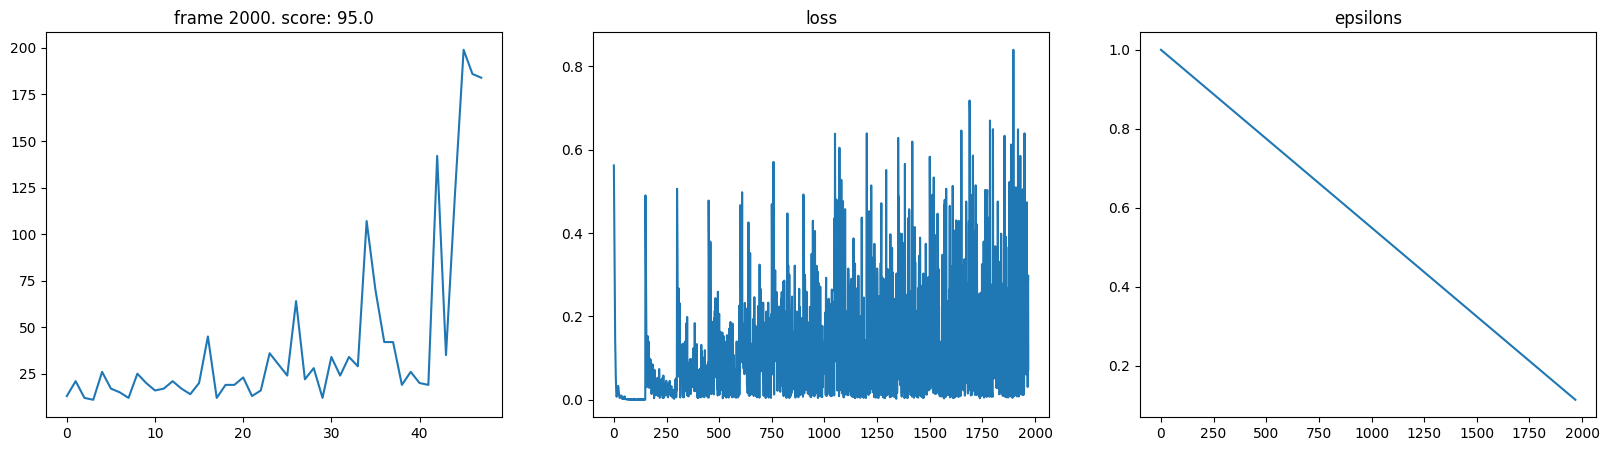

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\dqn folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\dqn\rl-video-episode-0.mp4
score:  200.0


In [5]:
from utils.DDQN import DDQNAgent

train_and_test_agent(DDQNAgent,environment, memory, batch_size, update_frequency, nframes, "results/dqn", epsilon=epsilon)


# Prioritized DDQN

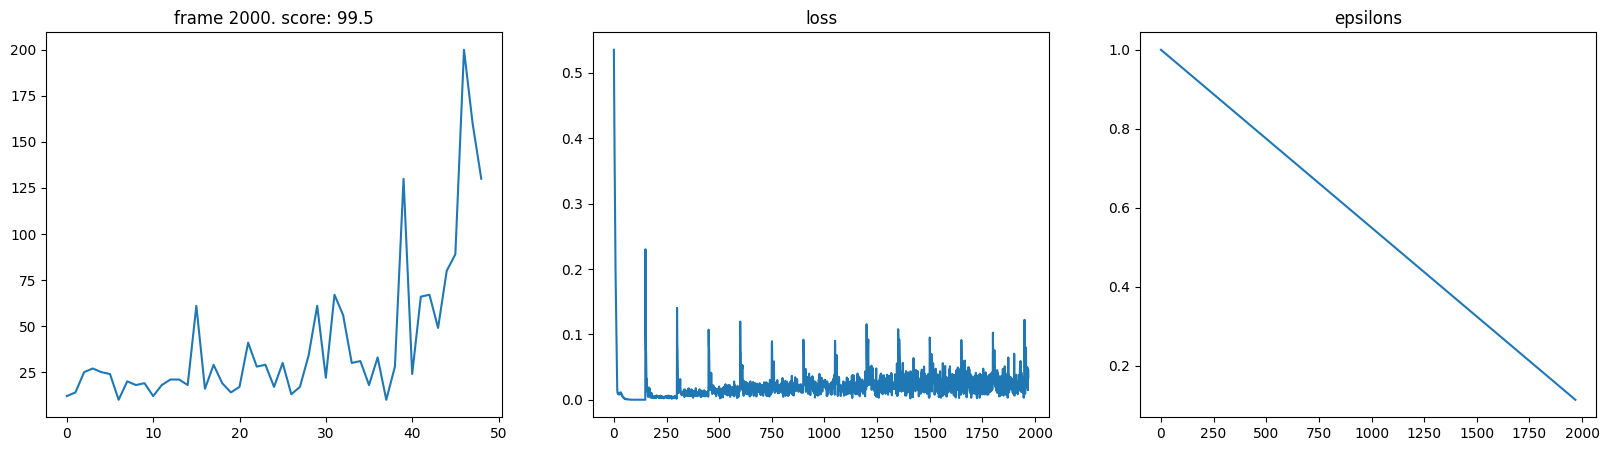

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\PER folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\PER\rl-video-episode-0.mp4
score:  111.0


In [6]:
from utils.PER import PERAgent

train_and_test_agent(PERAgent, environment, memory, batch_size, update_frequency, nframes, "results/PER", epsilon=epsilon)


# Dueling DDQN

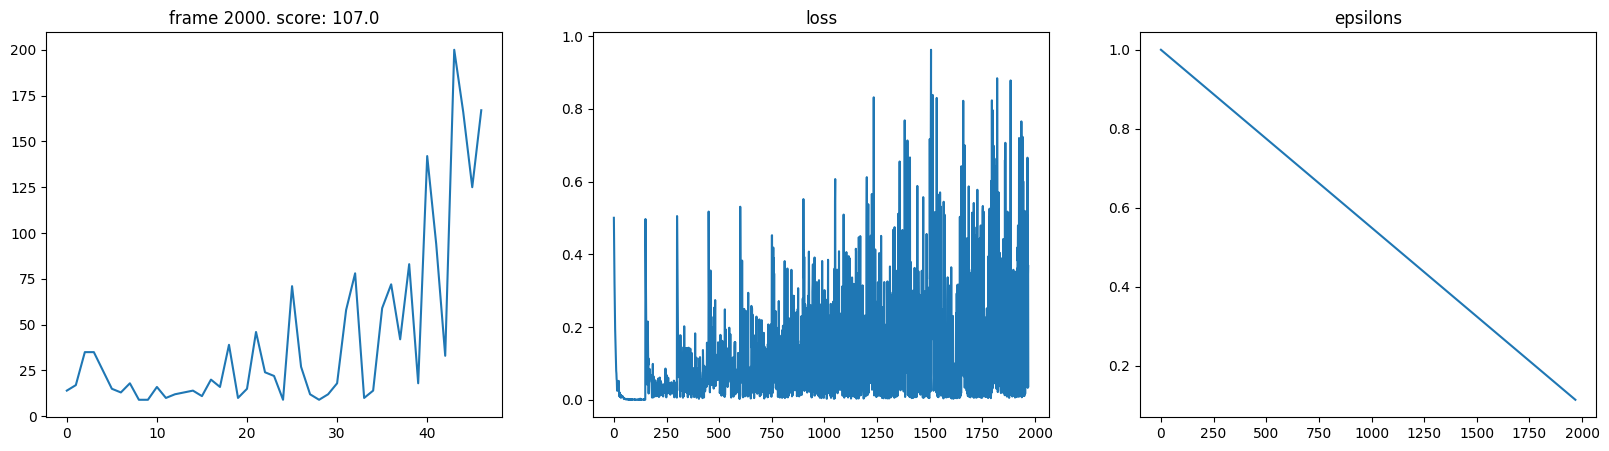

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\DUELLING folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\DUELLING\rl-video-episode-0.mp4
score:  197.0


In [7]:
from utils.DUELLING import DUELLINGAgent

train_and_test_agent(DUELLINGAgent, environment, memory, batch_size, update_frequency, nframes, "results/DUELLING", epsilon=epsilon)


# Multi-step learning

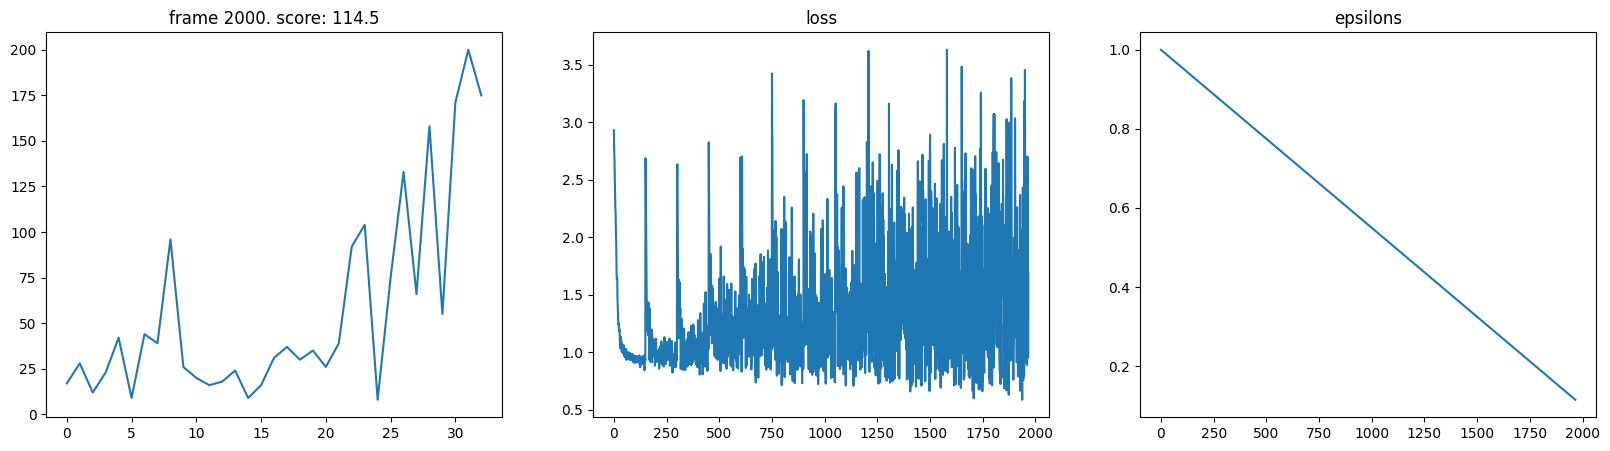

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\MULTISTEP folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\MULTISTEP\rl-video-episode-0.mp4
score:  200.0


In [8]:
from utils.MULTISTEP import MULTISTEPAgent

train_and_test_agent(MULTISTEPAgent, environment, memory, batch_size, update_frequency, nframes, "results/MULTISTEP", epsilon=epsilon)


# Distributional DQN

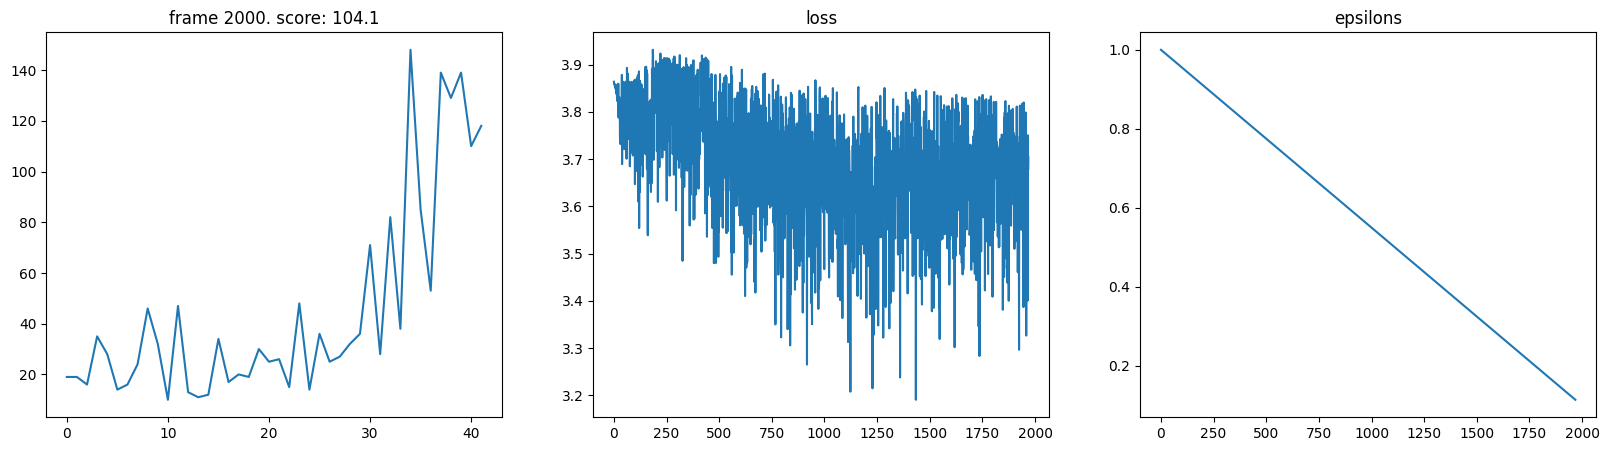

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\DISTRIBUTIONALDQN\rl-video-episode-0.mp4
score:  126.0


In [9]:
from utils.DISTRIBUTIONALDQN import DISTRIBUTIONALDQNAgent

train_and_test_agent(DISTRIBUTIONALDQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/DISTRIBUTIONALDQN", epsilon=epsilon)


# Noisy DQN


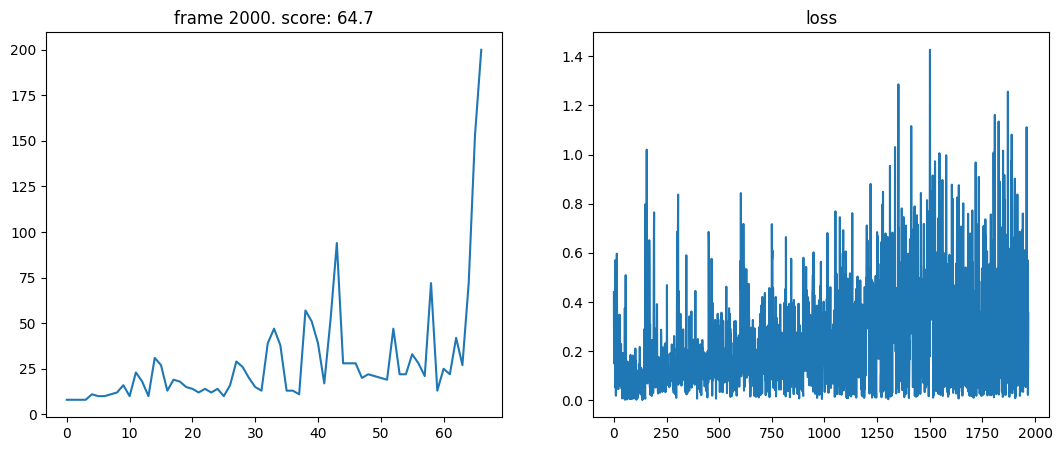

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\NOISYDQN folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4



Moviepy - Done !


Moviepy - video ready c:\Users\choho\RL_project\results\NOISYDQN\rl-video-episode-0.mp4
score:  75.0


In [10]:
from utils.NOISYDQN import NOISYDQNAgent
train_and_test_agent(NOISYDQNAgent, environment, memory, batch_size, update_frequency, nframes, "results/NOISYDQN", epsilon=None)



# Rainbow

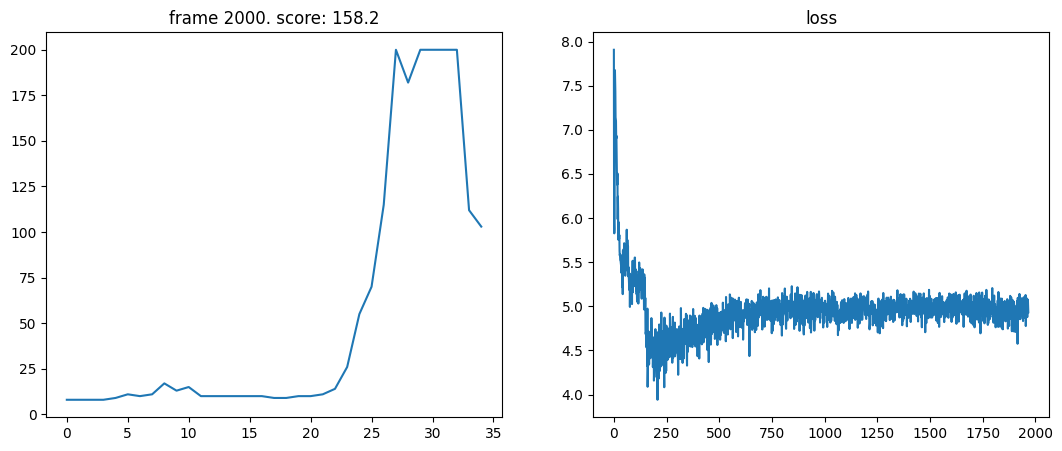

c:\Users\choho\RL_project\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:87: UserWarning: WARN: Overwriting existing videos at c:\Users\choho\RL_project\results\RAINBOW folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\RL_project\results\RAINBOW\rl-video-episode-0.mp4
score:  189.0


In [11]:
from utils.RAINBOW import RAINBOWAgent

train_and_test_agent(RAINBOWAgent, environment, memory, batch_size, update_frequency, nframes, "results/RAINBOW", epsilon=None)